In [1]:
import pandas as pd
import yaml
import pickle
import numpy as np
import keras
from keras import models
from keras import layers
import tensorflow as tf

In [2]:
with open('C:/Users/Sidney/LiveProject/AirBnB_config.yml', 'r') as file:
    config=yaml.safe_load(file)

In [3]:
parameters=config.get('general')

In [4]:
patience=parameters.get('patience')
batch_size=parameters.get('batch_size')
factor=parameters.get('factor')
experiment=parameters.get('experiment')
repeatable_run=parameters.get('repeatable_run')
tensorboard_callback=parameters.get('tensorboard_callback')

In [5]:
experiment

'5'

In [6]:
repeatable_run

False

Read the normalized pandas df that was calculated in the previous module

In [7]:
Ndf=pd.read_csv('C:/Users/Sidney/LiveProject/AirBnB_normalized_df.csv')

Need to remove the first column from the df

In [8]:
Ndf.head()

,Unnamed: 0,Nneighbourhood_group,Nneighbourhood,Nroom_type,Nminimum_nights,Nnumber_of_reviews,Nreviews_per_month,Ncalculated_host_listings_count,Nprice
0,0,0.4,0.239819,0.666667,-0.293993,-0.320410,-0.551505,-0.034716,0
1,1,0.2,0.045249,0.333333,-0.293993,0.487660,-0.445075,-0.156103,1
2,2,0.2,0.013575,0.666667,-0.196482,-0.522428,-0.682979,-0.186450,0
3,3,0.4,0.090498,0.333333,-0.293993,5.538099,2.221955,-0.186450,0
4,4,0.2,0.049774,0.333333,0.144805,-0.320410,-0.620372,-0.186450,0


In [9]:
Ndf = Ndf.iloc[: , 1:]

In [10]:
Ndf.head()

,Nneighbourhood_group,Nneighbourhood,Nroom_type,Nminimum_nights,Nnumber_of_reviews,Nreviews_per_month,Ncalculated_host_listings_count,Nprice
0,0.4,0.239819,0.666667,-0.293993,-0.320410,-0.551505,-0.034716,0
1,0.2,0.045249,0.333333,-0.293993,0.487660,-0.445075,-0.156103,1
2,0.2,0.013575,0.666667,-0.196482,-0.522428,-0.682979,-0.186450,0
3,0.4,0.090498,0.333333,-0.293993,5.538099,2.221955,-0.186450,0
4,0.2,0.049774,0.333333,0.144805,-0.320410,-0.620372,-0.186450,0


In [11]:
Ndf['Nprice'].value_counts()

0    34016
1    14879
Name: Nprice, dtype: int64

About twice as many below average prices vs above average prices

In [12]:
dataset=np.array(Ndf)

In [13]:
dataset

array([[ 0.4       ,  0.239819  ,  0.66666667, ..., -0.5515053 ,
        -0.03471607,  0.        ],
       [ 0.2       ,  0.04524887,  0.33333333, ..., -0.44507455,
        -0.15610285,  1.        ],
       [ 0.2       ,  0.01357466,  0.66666667, ..., -0.68297858,
        -0.18644954,  0.        ],
       ...,
       [ 0.2       ,  0.01357466,  0.33333333, ..., -0.68297858,
        -0.18644954,  0.        ],
       [ 0.2       ,  0.02714932,  1.        , ..., -0.68297858,
        -0.03471607,  0.        ],
       [ 0.2       ,  0.02714932,  0.66666667, ..., -0.68297858,
        -0.18644954,  0.        ]])

In [14]:
dataset.shape

(48895, 8)

In [15]:
data=dataset[:,:-1]

In [16]:
label=dataset[:,-1]

In [17]:
data.shape

(48895, 7)

In [18]:
label.shape

(48895,)

I will use first 30,000 rows as training data, second 10,000 rows as validation data, and last 8,895 rows as test data

In [19]:
label

array([0., 1., 0., ..., 0., 0., 0.])

In [20]:
train_data=data[:30000]
val_data=data[30000:40000]
test_data=data[40000:48895]

In [21]:
train_label=label[:30000]
val_label=label[30000:40000]
test_label=label[40000:48895]

In [22]:
train_data.shape

(30000, 7)

In [23]:
train_label

array([0., 1., 0., ..., 0., 0., 0.])

In [24]:
model=models.Sequential()
model.add(layers.Dense(12, input_dim=7, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                96        
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [27]:
zero_weight=1
if experiment=='0':
    early_stop=False
    one_weight=1
    epochs=1
elif experiment=='1':
    early_stop=False
    one_weight=1
    epochs=10
elif experiment=='2':
    early_stop=False
    one_weight=1
    epochs=50
elif experiment=='3':
    early_stop=False
    one_weight=2
    epochs=50
elif experiment=='4':
    early_stop=True
    es_monitor='loss'
    es_mode='min'
    one_weight=2
    epochs=50
elif experiment=='5':
    early_stop=True
    es_monitor='acc'
    es_mode='max'
    one_weight=2
    epochs=50
elif experiment=='6':
    early_stop=True
    es_monitor='acc'
    es_mode='max'
    one_weight=2
    epochs=20

In [29]:
callbacks_list=[keras.callbacks.TensorBoard(log_dir='C:/Users/Sidney/LiveProject/Tensorboard_Log'+experiment,
                                           histogram_freq=1, embeddings_freq=1 ),
                keras.callbacks.EarlyStopping(monitor=es_monitor, mode=es_mode, patience=patience),
                keras.callbacks.ModelCheckpoint(filepath='C:/Users/Sidney/LiveProject/Rob_model_exp'+experiment+'.h5',
                                              monitor='val_loss', save_best_only=True),
                keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience)]

if tensorboard_callback==False:
    del callbacks_list[0]

In [30]:
if repeatable_run:
    from numpy.random import seed
    seed(1)
    tf.random.set_seed(2)

In [31]:
if early_stop==False:
    history=model.fit(train_data,train_label, epochs=epochs, batch_size=batch_size,
                  validation_data=(val_data, val_label), class_weight={0: zero_weight, 1: one_weight})
    model.save('C:/Users/Sidney/LiveProject/Rob_model_exp'+experiment+'.h5')

else:
    history=model.fit(train_data,train_label, epochs=epochs, batch_size=batch_size, callbacks=callbacks_list,
                  validation_data=(val_data, val_label), class_weight={0: zero_weight, 1: one_weight})

Epoch 1/50
 1/60 [..............................] - ETA: 0s - loss: 1.0714 - acc: 0.2840WARNING:tensorflow:From C:\Users\Sidney\anaconda3\envs\DeepLearning\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
60/60 [==============================] - 2s 41ms/step - loss: 0.9460 - acc: 0.4515 - val_loss: 0.6959 - val_acc: 0.6299
Epoch 2/50
60/60 [==============================] - 0s 8ms/step - loss: 0.8771 - acc: 0.6431 - val_loss: 0.6455 - val_acc: 0.7108
Epoch 3/50
60/60 [==============================] - 0s 8ms/step - loss: 0.8490 - acc: 0.6810 - val_loss: 0.6155 - val_acc: 0.7339
Epoch 4/50
60/60 [==============================] - 0s 6ms/step - loss: 0.8259 - acc: 0.6947 - val_loss: 0.5901 - val_acc: 0.7469
Epoch 5/50
60/60 [==============================] - 0s 7ms/step - loss: 0.8017 - acc: 0.7072 - val_lo

In [207]:
import matplotlib.pyplot as plt

In [208]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [209]:
epochs=range(1,len(acc)+1)

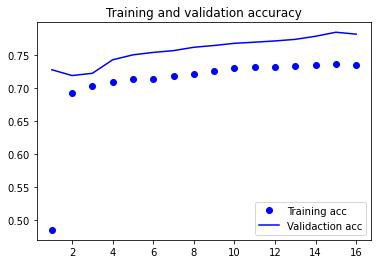

In [210]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs,val_acc, 'b', label='Validaction acc')
plt.title('Training and validation accuracy')
plt.legend()

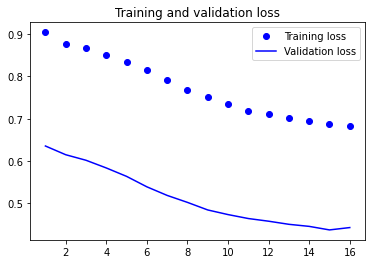

In [211]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

I will now eavaluate the model on the test dataset,
create an array for the actual label from the test data
create an array for the predicted label from the model on the test data
and plot the confusion matrix from these two arrays

In [212]:
# evaluate the model on the test data
score = model.evaluate(test_data, test_label, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 75.23%


In [213]:
test_label

array([1., 0., 0., ..., 0., 0., 0.])

In [214]:
test_pred=model.predict(test_data)

In [215]:
test_pred

array([[0.76657385],
       [0.11763158],
       [0.260869  ],
       ...,
       [0.6870369 ],
       [0.1194317 ],
       [0.23219532]], dtype=float32)

In [216]:
Binary_test_pred=np.rint(test_pred)

In [217]:
Binary_test_pred

array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [218]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

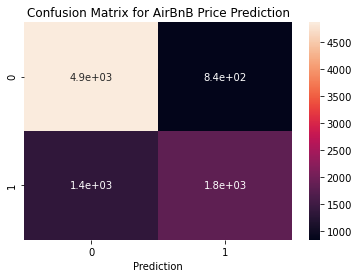

In [219]:
cfmap=metrics.confusion_matrix(y_true=test_label, y_pred=Binary_test_pred)
label = ["0", "1"]
sns.heatmap(cfmap, annot = True, xticklabels = label, yticklabels = label)
plt.xlabel("Prediction")
plt.title("Confusion Matrix for AirBnB Price Prediction")
plt.show()